<a href="https://colab.research.google.com/github/dBalag/Chinook/blob/main/Chinook_univariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Univariate Analytical Techniques**

In [2]:
import pandas as pd
from google.colab import files

# Upload the files
uploaded = files.upload()

# Load datasets
media_type = pd.read_csv('media_type.csv')
playlist = pd.read_csv('playlist.csv')
playlist_track = pd.read_csv('playlist_track.csv')
album = pd.read_csv('album.csv')
artist = pd.read_csv('artist.csv')
employee_cleaned = pd.read_csv('employee_cleaned.csv')
invoice_cleaned = pd.read_csv('invoice_cleaned.csv')
invoice_line = pd.read_csv('invoice_line.csv')
track_cleaned = pd.read_csv('track_cleaned.csv')
genre = pd.read_csv('genre.csv')
customer_cleaned = pd.read_csv('customer_cleaned.csv')


Saving album.csv to album.csv
Saving artist.csv to artist (1).csv
Saving customer_cleaned.csv to customer_cleaned (1).csv
Saving employee_cleaned.csv to employee_cleaned (1).csv
Saving genre.csv to genre (1).csv
Saving invoice_cleaned.csv to invoice_cleaned (1).csv
Saving invoice_line.csv to invoice_line (1).csv
Saving media_type.csv to media_type (1).csv
Saving playlist.csv to playlist (1).csv
Saving playlist_track.csv to playlist_track (1).csv
Saving track_cleaned.csv to track_cleaned (1).csv


Calculate basic statistics for the numeric columns in the datasets.

In [8]:
# Basic statistics for 'quantity' and 'unit_price' columns of invoice_line dataset
quantity_stats = invoice_line['quantity'].describe()
unit_price_stats = invoice_line['unit_price'].describe()

print("Basic Statistics for Quantity:")
print(quantity_stats)
print("\nBasic Statistics for Unit Price:")
print(unit_price_stats)


Basic Statistics for Quantity:
count    2240.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: quantity, dtype: float64

Basic Statistics for Unit Price:
count    2240.000000
mean        1.039554
std         0.217069
min         0.990000
25%         0.990000
50%         0.990000
75%         0.990000
max         1.990000
Name: unit_price, dtype: float64


Plot the distributions of numerical variables using histograms and box plots.

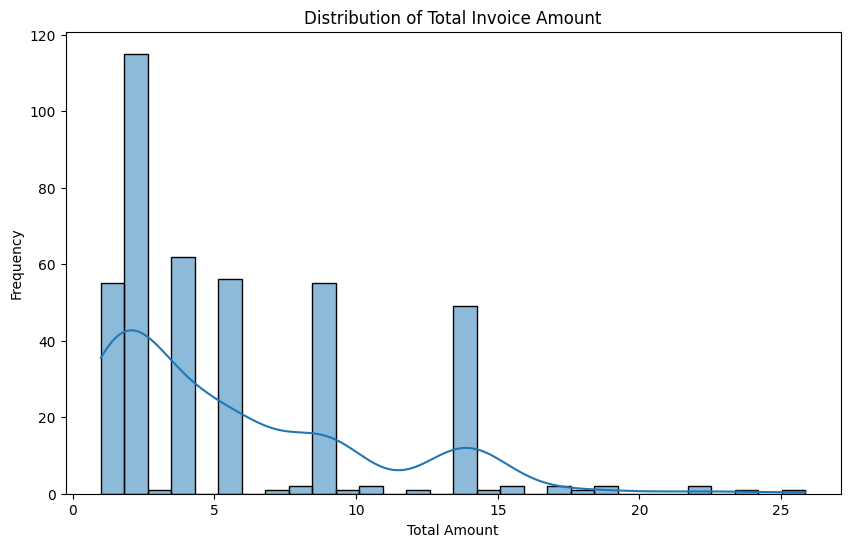

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'total' in the 'invoice_cleaned' dataset
plt.figure(figsize=(10, 6))
sns.histplot(invoice_cleaned['total'], bins=30, kde=True)
plt.title('Distribution of Total Invoice Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()




Conclusions:

*   The histogram reveals that most invoices have relatively low total amounts, with a few common total amounts appearing more frequently. This could indicate popular pricing tiers or common purchase combinations among customers. The right-skewed nature of the histogram suggests that higher total amounts are less common, but still present in the dataset.

*   This kind of distribution is typical in many real-world datasets where lower values are more frequent, and higher values are less common. This information can be useful for understanding customer purchasing behavior, optimizing pricing strategies, and identifying popular products or services.




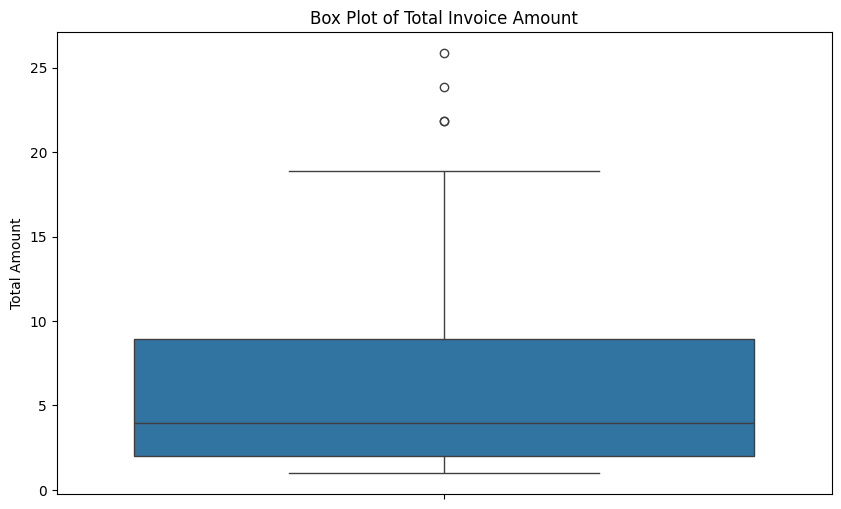

In [10]:
# Box plot for 'total' in the 'invoice_cleaned' dataset
plt.figure(figsize=(10, 6))
sns.boxplot(y=invoice_cleaned['total'])
plt.title('Box Plot of Total Invoice Amount')
plt.ylabel('Total Amount')
plt.show()

Conclusion:

*   The boxplot of the total invoice amount shows a relatively wide distribution with a median around 5. The majority of the data falls between 2 and 8, but there are invoices with total amounts as high as 20, and at least one outlier above 20. This suggests that while most invoices are of moderate amounts, there are a few that are significantly higher, which could be due to larger purchases or higher-priced items.


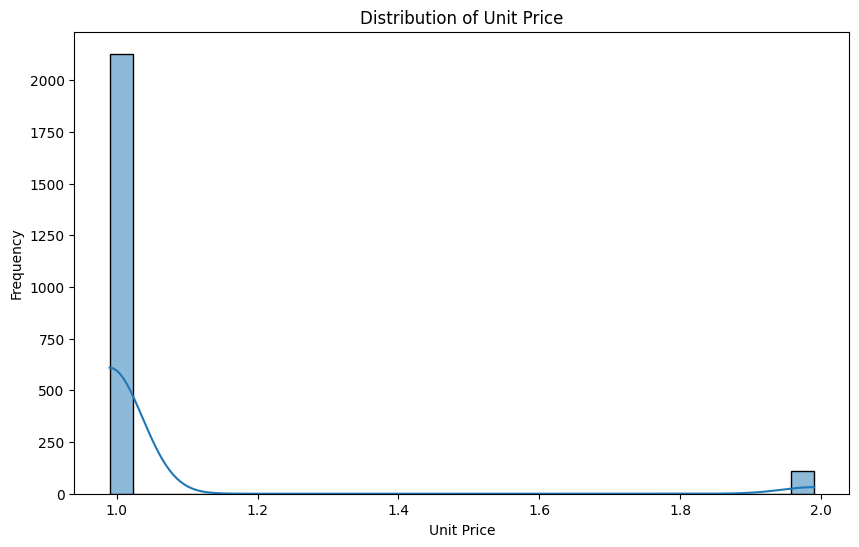

In [11]:
# Histogram for 'unit_price' in the 'invoice_line' dataset
plt.figure(figsize=(10, 6))
sns.histplot(invoice_line['unit_price'], bins=30, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

Conclusion


*   The right skewness and presence of high-value invoices suggest opportunities for upselling or targeting high-value customers. Marketing strategies could focus on encouraging small purchasers to increase their purchase size.



Analysis of the frequency of categories in categorical variables.

In [14]:
# Frequency count for 'country' in the 'customer' dataset
customer_cleaned['country'].value_counts()


country
USA               13
Canada             8
Brazil             5
France             5
Germany            4
United Kingdom     3
Portugal           2
India              2
Czech Republic     2
Denmark            1
Belgium            1
Austria            1
Finland            1
Ireland            1
Italy              1
Netherlands        1
Poland             1
Spain              1
Sweden             1
Norway             1
Australia          1
Argentina          1
Chile              1
Hungary            1
Name: count, dtype: int64

Customers basically come from USA.

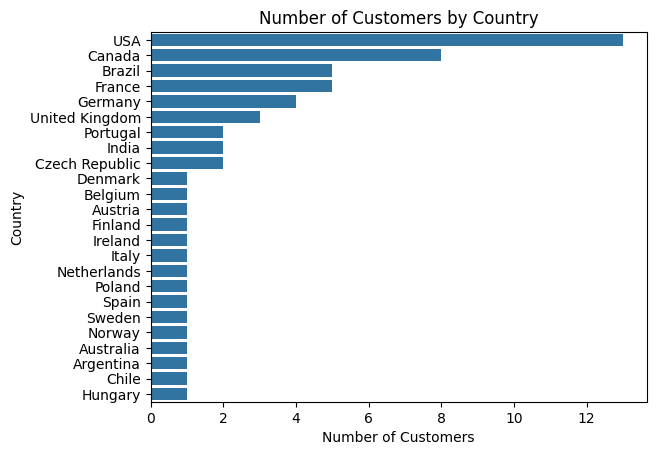

In [21]:
# Bar plot for 'country' in the customer_cleaned dataset
sns.countplot(y='country', data=customer_cleaned, order=customer_cleaned['country'].value_counts().index)
plt.title('Number of Customers by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

In [20]:
# Merge the track_cleaned and genre datasets on 'genre_id'
merged_df = pd.merge(track_cleaned, genre, how='left', on='genre_id')

# Frequency count for 'name' in the merged dataset
genre_frequency = merged_df['name_y'].value_counts()

print(genre_frequency)

name_y
Rock                  1297
Latin                  579
Metal                  374
Alternative & Punk     332
Jazz                   130
TV Shows                93
Blues                   81
Classical               74
Drama                   64
R&B/Soul                61
Reggae                  58
Pop                     48
Soundtrack              43
Alternative             40
Hip Hop/Rap             35
Electronica/Dance       30
Heavy Metal             28
World                   28
Sci Fi & Fantasy        26
Easy Listening          24
Comedy                  17
Bossa Nova              15
Science Fiction         13
Rock And Roll           12
Opera                    1
Name: count, dtype: int64


To get the name of the genres first i needed to merge 'track_cleaned' dataset with 'genre' using 'genre_id', then i counted the values in Chinook cataloge x genre delivering those results.

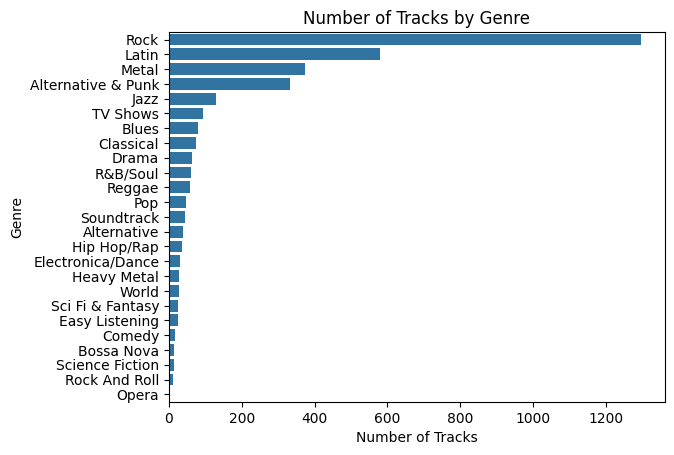

In [23]:
# Bar plot for 'genre' in the merged dataset
sns.countplot(y='name_y', data=merged_df, order=merged_df['name_y'].value_counts().index)
plt.title('Number of Tracks by Genre')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.show()